[link text](https://)
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [5]:
# Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)

#Create a New Database

In [7]:
spark.sql("CREATE DATABASE Bostonho")

DataFrame[]

In [8]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
| bostonho|
|  default|
+---------+



# Upload Data to Working Directory

In [9]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing (1).csv


{'BostonHousing (1).csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.0937

# Load Data to Spark Cluster

In [10]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [11]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [12]:

dataset.write.mode("overwrite").saveAsTable("bostonho.bos_housing")


# Show data from Hive Table

In [13]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



**Task 1: Data Overview**

In [14]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonho.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [15]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonho.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


**Task 2: Descriptive Statistics**

In [16]:
# Task 2: Calculate and display basic statistics for the "medv" (median home value) column
medv_stats = spark.sql("""
    SELECT
        AVG(medv) AS mean_medv,
        STDDEV(medv) AS stddev_medv,
        MIN(medv) AS min_medv,
        MAX(medv) AS max_medv
    FROM bostonho.bos_housing
""")
medv_stats.show()

+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+



In [17]:
# Task 2: Calculate and display the mean "rm" (average number of rooms per dwelling)
mean_rm = spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonho.bos_housing")
mean_rm.show()

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



**Task 3: Data Exploration**

In [18]:
# Task 3: Property with the highest crime rate ("crim")
highest_crim = spark.sql("SELECT * FROM bostonho.bos_housing ORDER BY crim DESC LIMIT 1")
highest_crim.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [19]:
# Task 3: Property with the lowest median home value ("medv")
lowest_medv = spark.sql("SELECT * FROM bostonho.bos_housing ORDER BY medv ASC LIMIT 1")
lowest_medv.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



**Task 4: Data Distribution Analysis**

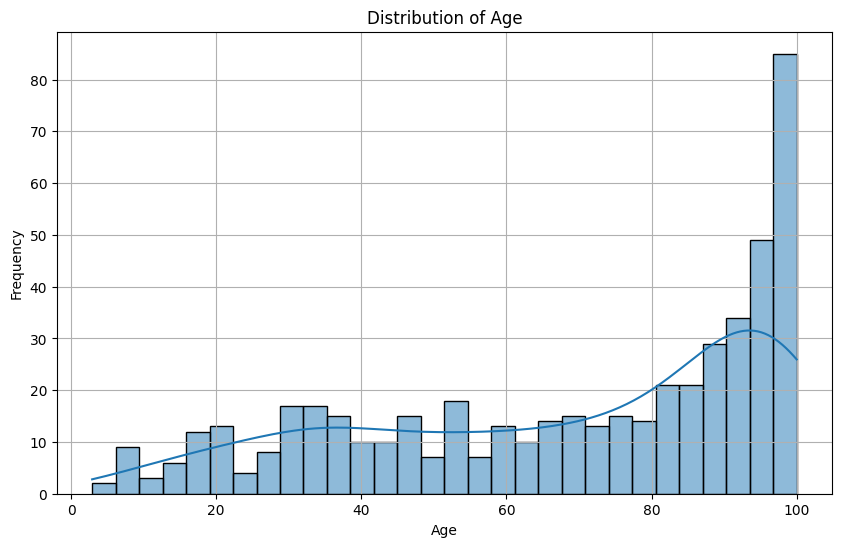

In [38]:
# Task 4: Create a histogram of distribution of the "age"
age_distribution = spark.sql("SELECT age FROM bostonh.bos_housing")

# Convert the PySpark DataFrame to a Pandas DataFrame
age_distribution_pandas = age_distribution.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(age_distribution_pandas['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Task 4: Calculate and report the percentage of properties with a "chas" value of 1
chas_percentage = spark.sql("""
    SELECT
        (SUM(CASE WHEN chas = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS chas_percentage
    FROM bostonho.bos_housing
""")
chas_percentage.show()

+----------------+
| chas_percentage|
+----------------+
|6.91699604743083|
+----------------+



**Task 5: Correlation Analysis**

In [22]:
# Task 5: Calculate the correlation coefficient between "rm" and "medv"
rm_medv_corr = spark.sql("SELECT corr(rm, medv) AS rm_medv_correlation FROM bostonho.bos_housing")
rm_medv_corr.show()

+-------------------+
|rm_medv_correlation|
+-------------------+
| 0.6953599470715401|
+-------------------+



In [23]:
# Task 5: Investigate if there is any correlation between pupil-teacher ratio and nitrogen oxide concentration
ptratio_nox_corr = spark.sql("SELECT corr(ptratio, nox) AS ptratio_nox_correlation FROM bostonho.bos_housing")
ptratio_nox_corr.show()

+-----------------------+
|ptratio_nox_correlation|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



**Task 6: Advanced Querying**

In [24]:
# Task 6: Identify and display the top 5 neighborhoods with the highest median home values ("medv")
top_5_neighborhoods = spark.sql("SELECT * FROM bostonho.bos_housing ORDER BY medv DESC LIMIT 5")
top_5_neighborhoods.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [25]:
# Task 6: Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with 0
average_age_chas = spark.sql("SELECT chas, AVG(age) AS average_age FROM bostonho.bos_housing GROUP BY chas")
average_age_chas.show()


+----+-----------------+
|chas|      average_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



**Task 7: Visualization**

In [27]:
# Task 7: Create a Hive view named "property_age_view" that includes the "age" and "medv"
spark.sql("CREATE VIEW property_age_views AS SELECT age, medv FROM bostonho.bos_housing")

DataFrame[]

In [30]:
# Load the data from the Hive view into a PySpark DataFrame
property_age_views = spark.sql("SELECT * FROM property_age_views")

In [29]:
#Convert to Pandas
property_age_pandas = property_age_views.toPandas()

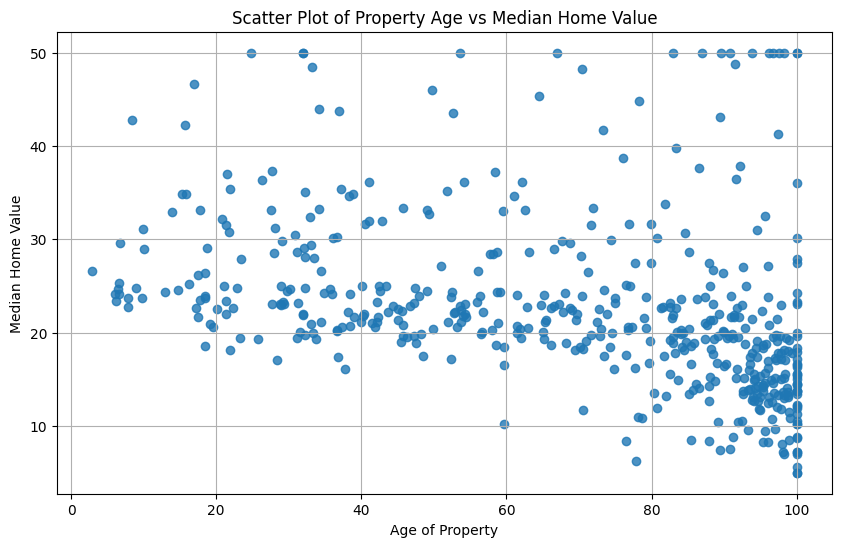

In [39]:
# Task 7: Plot a scatter plot of property age against median home value

plt.figure(figsize=(10, 6))
plt.scatter(property_age_pandas['age'], property_age_pandas['medv'], alpha=0.8)
plt.title('Scatter Plot of Property Age vs Median Home Value')
plt.xlabel('Age of Property')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

**Task 8: Outliers Detection**

In [33]:
# Task 8: Identify and report properties with a "crim" value greater than 10
high_crim_properties = spark.sql("SELECT * FROM bostonho.bos_housing WHERE crim > 10")
high_crim_properties.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

Outliers can significantly skew the results of statistical analyses and can affect the accuracy of predictive models. Detecting outliers helps in ensuring the quality and reliability of data analysis by identifying data points that deviate significantly from other observations. Outliers can indicate variability in measurement, experimental errors, or novelty.

**Task 9: Hypothesis Testing**

In [36]:
# Null Hypothesis (H0): No significant relationship between average number of rooms (rm) and median home value (medv).
# Alternative Hypothesis (H1): Significant relationship between average number of rooms and median home value.

from pyspark.sql import functions as F
import scipy.stats as stats

# Perform simple linear regression to test the relationship
mean_values = spark.sql("""
    SELECT
        AVG(medv) AS mean_medv,
        AVG(rm) AS mean_rm,
        COVAR_POP(medv, rm) / VAR_POP(rm) AS beta
    FROM bostonh.bos_housing
""").collect()[0]

mean_medv = mean_values['mean_medv']
mean_rm = mean_values['mean_rm']
beta = mean_values['beta']

# Calculate residuals
residuals_df = spark.sql(f"""
    SELECT *, (medv - ({beta} * rm + {mean_medv} - {beta} * {mean_rm})) AS residuals
    FROM bostonh.bos_housing
""")
residuals_df.createOrReplaceTempView("residuals_view")

# Calculate variance of residuals and standard error
variance_residuals = spark.sql("SELECT VAR_POP(residuals) AS variance_residuals FROM residuals_view").collect()[0]['variance_residuals']
n = residuals_df.count()
variance_rm = spark.sql("SELECT VAR_POP(rm) AS variance_rm FROM bostonh.bos_housing").collect()[0]['variance_rm']
standard_error = (variance_residuals / (n * variance_rm)) ** 0.5

# Calculate t-statistic and p-value
t_statistic = beta / standard_error
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n-2))

# Print results
print(f"Regression Coefficient (beta): {beta}")
print(f"Standard Error: {standard_error}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Regression Coefficient (beta): 9.10210898118032
Standard Error: 0.4181976244725058
T-Statistic: 21.765090111789323
P-Value: 0.0
Reject the null hypothesis.
